**Data not available, this file only serves as an illustration.**

Beware, if you run the cells, you will get errors and will loose the images.
To avoid this problem, you could replace the input data names.

How did you start Notebook
--------------------------

When starting this notebook using this:
```bash
~/tutorial-env/bin/ipython notebook --pylab=inline
```
comment the code in the next cell.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np # Numpy for general purpose processing
import SimpleITK as sitk # SimpleITK to load images
import sys
sys.path.append('../')
from core.ialm import recover # Candes et al.’s RPCA approach

In [2]:
# load first image
data_folder = '/home/fbudin/Data/BullEyeSimulation/3D'
slice_nr = 84
im_names = ['SRI24_T1_Atlas_Affine_AlignedTo301.mha','301.mha','302.mha','303.mha','304.mha']#,'305.mha','306.mha','307.mha','309.mha','310.mha']  # 308 intensity range is too off
num_of_data = len(im_names)
tmp = sitk.ReadImage(data_folder+'/'+im_names[0]) # image in SITK format
tmp = sitk.GetArrayFromImage(tmp) # get numpy array
z_dim, x_dim, y_dim = tmp.shape # get 3D volume shape
print tmp.shape
tmp = tmp[slice_nr,:,:] # extract our slice
tmp = tmp.reshape(-1) # vectorize

(140, 180, 158)


In [3]:
Y = np.zeros((len(tmp), len(im_names)))
for i, im_file in enumerate(im_names):
    tmp = sitk.ReadImage(data_folder+'/'+im_file)
    tmp = sitk.GetArrayFromImage(tmp)
    tmp = tmp[slice_nr,:,:]
    Y[:,i] = tmp.reshape(-1)

In [4]:
gamma = 0.8* sqrt(float(Y.shape[1])/Y.shape[0])
low_rank, sparse, n_iter,rank, sparsity = recover(Y,gamma)


[iter: 0000]: rank(P) = 0001, |C|_0 = 12708, crit=0.2469169868
[iter: 0010]: rank(P) = 0005, |C|_0 = 38799, crit=0.0004856393
[iter: 0020]: rank(P) = 0005, |C|_0 = 37455, crit=0.0000001049


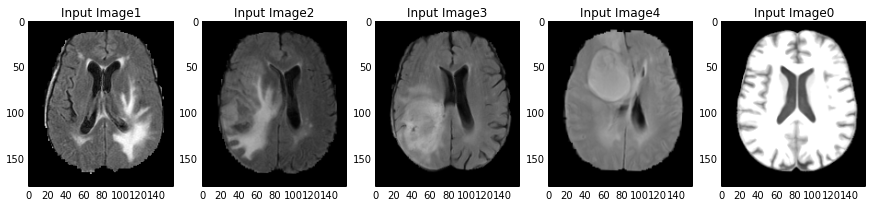

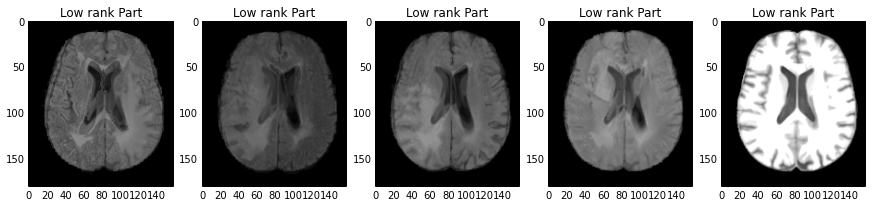

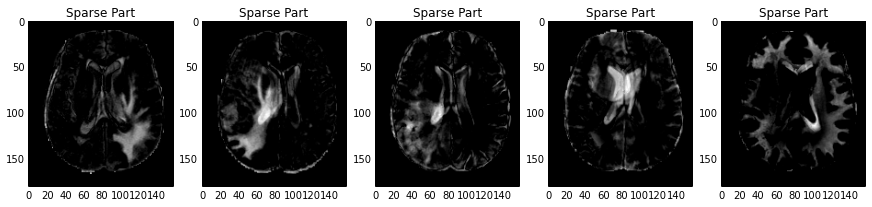

In [5]:
fig = plt.figure(figsize=(15,15))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i)
    implot = imshow(Y[:,i].reshape(x_dim,y_dim),cm.gray)
    plt.title('Input Image' + str(i))
    #plt.colorbar()
    implot.set_clim(0,560)
    
fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i)
    implot =imshow(np.abs(low_rank[:,i].reshape(x_dim,y_dim)),cm.gray)
    plt.title('Low rank Part')
   # plt.colorbar()
    implot.set_clim(0,560)

fig = plt.figure(figsize=(15,5))
for i in range(num_of_data):
    fig.add_subplot(1,num_of_data,i)
    implot = imshow(np.abs(sparse[:,i].reshape(x_dim,y_dim)),cm.gray)
    plt.title('Sparse Part')
   # plt.colorbar()
    

In [6]:
lamda = 0.8
r = np.arange(0.1,1,.05)
print r
sparsity = zeros(r.size)
rank = zeros(r.size)
i = 0
for lamda in r:
    gamma = lamda * sqrt(float(Y.shape[1])/Y.shape[0])
    low_rank, sparse, n_iter,rank[i], sparsity[i] = recover(Y,gamma)
    i = i+1

[ 0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6   0.65
  0.7   0.75  0.8   0.85  0.9   0.95]
[iter: 0000]: rank(P) = 0000, |C|_0 = 78076, crit=0.1993912522
[iter: 0010]: rank(P) = 0000, |C|_0 = 83735, crit=0.0000191730
[iter: 0020]: rank(P) = 0000, |C|_0 = 83769, crit=0.0000000865
[iter: 0000]: rank(P) = 0000, |C|_0 = 74253, crit=0.2928458123
[iter: 0010]: rank(P) = 0000, |C|_0 = 83727, crit=0.0000378292
[iter: 0020]: rank(P) = 0000, |C|_0 = 83767, crit=0.0000002244
[iter: 0000]: rank(P) = 0000, |C|_0 = 66661, crit=0.3763848785
[iter: 0010]: rank(P) = 0000, |C|_0 = 83710, crit=0.0000652657
[iter: 0020]: rank(P) = 0000, |C|_0 = 83766, crit=0.0000002427
[iter: 0000]: rank(P) = 0000, |C|_0 = 59715, crit=0.4500734602
[iter: 0010]: rank(P) = 0000, |C|_0 = 83693, crit=0.0000950438
[iter: 0020]: rank(P) = 0000, |C|_0 = 83766, crit=0.0000002561
[iter: 0000]: rank(P) = 0001, |C|_0 = 48421, crit=0.4994810781
[iter: 0010]: rank(P) = 0001, |C|_0 = 83760, crit=0.0004850670
[iter: 

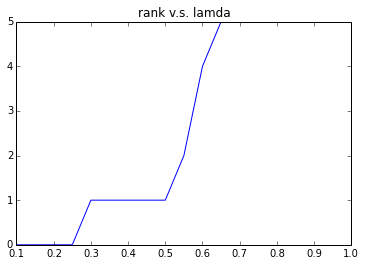

In [10]:
fig = plt.figure
plt.plot(r,rank)
plt.title('rank v.s. lamda')

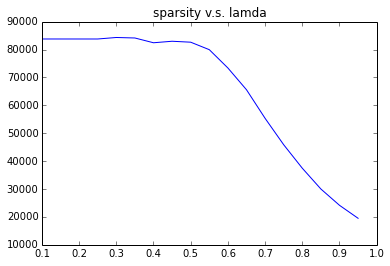

In [11]:
fig = plt.figure
plt.plot(r,sparsity)
plt.title('sparsity v.s. lamda')